## Importing libraries and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/ineuron_dataset/test_dataset.csv')
train_df = pd.read_csv('/content/drive/MyDrive/ineuron_dataset/train_dataset.csv')

In [ ]:
train_df.shape

(10590, 9)

In [ ]:
test_df.shape

(1470, 9)

## Checking and dealing with null values

In [ ]:
train_df.isna().sum()

date              0
city              0
CO                0
NO2               0
O3                0
PM10              0
PM2.5             0
SO2               0
AQI_calculated    0
dtype: int64

In [ ]:
test_df.isna().sum()

date              0
city              0
CO                0
NO2               0
O3                0
PM10              0
PM2.5             0
SO2               0
AQI_calculated    0
dtype: int64

In [ ]:
new_df = pd.concat([train_df, test_df])

In [ ]:
new_df

,date,city,CO,NO2,O3,PM10,PM2.5,SO2,AQI_calculated
0,2021-01-01,Ahmedabad,1.414,34.932,54.916,165.297,143.591,37.484,318.0
1,2021-01-01,Chennai,0.929,29.016,52.266,87.310,73.634,27.712,145.0
2,2021-01-01,Delhi,3.331,66.434,38.211,388.088,336.690,60.726,467.0
3,2021-01-01,Hyderabad,2.327,48.043,45.071,181.563,162.776,33.134,333.0
4,2021-01-01,Jaipur,0.902,20.329,71.968,123.530,112.856,11.614,276.0
...,...,...,...,...,...,...,...,...,...
1465,2024-05-30,Chennai,0.519,18.450,100.963,44.626,36.449,26.274,101.0
1466,2024-05-30,Bangalore,0.372,11.546,32.687,5.913,3.631,4.319,33.0
1467,2024-05-30,Ahmedabad,0.363,13.481,64.542,62.650,23.630,21.309,65.0
1468,2024-05-30,Pune,0.247,3.463,54.851,42.452,13.358,3.482,55.0


In [ ]:
new_df.isna().sum()

date              0
city              0
CO                0
NO2               0
O3                0
PM10              0
PM2.5             0
SO2               0
AQI_calculated    0
dtype: int64

In [ ]:
new_df.reset_index(drop=True, inplace=True)

In [ ]:
new_df.isna().sum()

date              0
city              0
CO                0
NO2               0
O3                0
PM10              0
PM2.5             0
SO2               0
AQI_calculated    0
dtype: int64

In [ ]:
copy_df = new_df.copy()

## Checking and removing Outliers

In [ ]:
# copy_df.shape

In [ ]:
# column = ['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2', 'AQI_calculated']

In [ ]:
# for col in column:
#     q1 = copy_df[col].quantile(0.25)
#     q3 = copy_df[col].quantile(0.75)
#     iqr = q3 - q1
#     print('Number of lower outliers in ',col,' is: ',copy_df.loc[(copy_df[col] < (q1 - (1.5*iqr))),col].count())
#     print('Number of upper outliers in ',col,' is: ',copy_df.loc[copy_df[col] > (q3 + (1.5*iqr)), col].count())
#     print()

In [ ]:
# def remove_outliers_iqr(df, column_name):
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     for index, row in df.iterrows():
#         if row[column_name] < lower_bound or row[column_name] > upper_bound:
#             # If the value is an outlier, drop the row
#             df.drop(index, inplace=True)

In [ ]:
# for col in column:
#     Q1 = copy_df[col].quantile(0.25)
#     Q3 = copy_df[col].quantile(0.75)
#     iqr = Q3 - Q1
#     lower = q1 - iqr * 1.5
#     upper = q3 + iqr * 1.5
#     df[col] = df[col > lower | col < upper]

## Dealing with city column

In [ ]:
# # Calculate average pollutant level for each city
# city_avg_pollutant = copy_df.groupby('city')['AQI_calculated'].mean().to_dict()

In [ ]:
# city_avg_pollutant

In [ ]:
# # Map average pollutant levels to the city column
# copy_df['city_encoded'] = copy_df['city'].map(city_avg_pollutant)

In [ ]:
# copy_df.sample(10)

## Model Building

In [ ]:
copy_df

,date,city,CO,NO2,O3,PM10,PM2.5,SO2,AQI_calculated
0,2021-01-01,Ahmedabad,1.414,34.932,54.916,165.297,143.591,37.484,318.0
1,2021-01-01,Chennai,0.929,29.016,52.266,87.310,73.634,27.712,145.0
2,2021-01-01,Delhi,3.331,66.434,38.211,388.088,336.690,60.726,467.0
3,2021-01-01,Hyderabad,2.327,48.043,45.071,181.563,162.776,33.134,333.0
4,2021-01-01,Jaipur,0.902,20.329,71.968,123.530,112.856,11.614,276.0
...,...,...,...,...,...,...,...,...,...
12055,2024-05-30,Chennai,0.519,18.450,100.963,44.626,36.449,26.274,101.0
12056,2024-05-30,Bangalore,0.372,11.546,32.687,5.913,3.631,4.319,33.0
12057,2024-05-30,Ahmedabad,0.363,13.481,64.542,62.650,23.630,21.309,65.0
12058,2024-05-30,Pune,0.247,3.463,54.851,42.452,13.358,3.482,55.0


In [ ]:
copy_df['city'].value_counts()

city
Ahmedabad    1206
Chennai      1206
Delhi        1206
Hyderabad    1206
Jaipur       1206
Kolkata      1206
Mumbai       1206
Pune         1206
Surat        1206
Bangalore    1206
Name: count, dtype: int64

In [ ]:
city_list = [f'df_{city.lower()}' for city in copy_df['city'].value_counts().index]
city_list

['df_ahmedabad',
 'df_chennai',
 'df_delhi',
 'df_hyderabad',
 'df_jaipur',
 'df_kolkata',
 'df_mumbai',
 'df_pune',
 'df_surat',
 'df_bangalore']

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
copy_df['city'].value_counts()

city
Ahmedabad    1206
Chennai      1206
Delhi        1206
Hyderabad    1206
Jaipur       1206
Kolkata      1206
Mumbai       1206
Pune         1206
Surat        1206
Bangalore    1206
Name: count, dtype: int64

In [ ]:
df_delhi = copy_df[copy_df['city']=='Delhi'][['date', 'AQI_calculated']]

In [ ]:
df_delhi['date'] = pd.to_datetime(df_delhi['date'], yearfirst=True)

In [ ]:
df_delhi.dtypes

date              datetime64[ns]
AQI_calculated           float64
dtype: object

In [ ]:
df_delhi.set_index('date', inplace=True)

In [ ]:
df_delhi

,AQI_calculated
date,
2021-01-01,467.0
2021-01-02,459.0
2021-01-03,460.0
2021-01-04,465.0
2021-01-05,470.0
...,...
2024-05-26,312.0
2024-05-27,322.0
2024-05-28,319.0


In [ ]:
df_delhi.head()

,AQI_calculated
date,
2021-01-01,467.0
2021-01-02,459.0
2021-01-03,460.0
2021-01-04,465.0
2021-01-05,470.0


In [ ]:
# df_delhi.resample(rule='M').max().plot(figsize=(10, 7))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_delhi['AQI_calculated'])

ADF Statistics: -3.8778501749862855
p- value: 0.002204041781193058
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

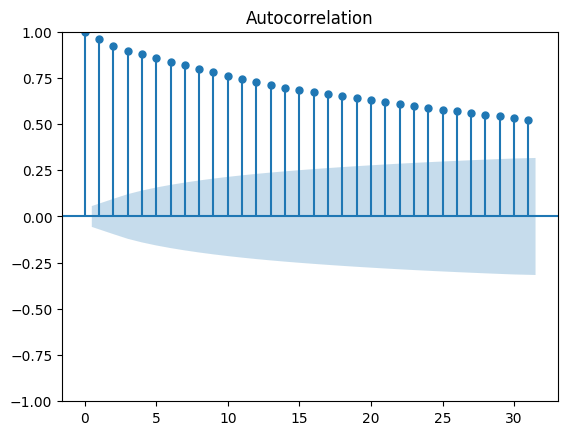

In [ ]:
acf = plot_acf(df_delhi['AQI_calculated'])

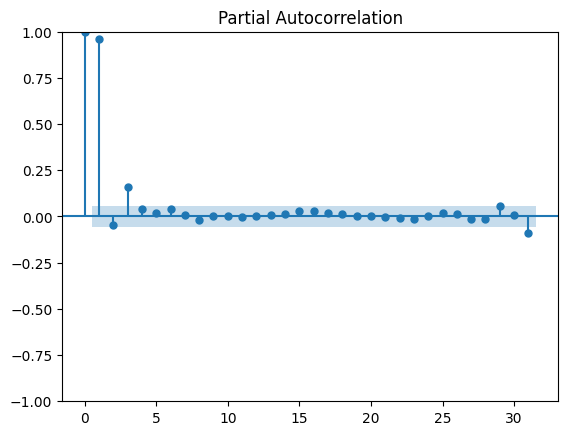

In [ ]:
pacf = plot_pacf(df_delhi['AQI_calculated'])

## splitting the dataset

In [ ]:
df_delhi.shape

(1206, 1)

In [ ]:
df_delhi.iloc[1100]

AQI_calculated    392.0
Name: 2024-02-12 00:00:00, dtype: float64

In [ ]:
df_delhi.iloc[-1]

AQI_calculated    204.0
Name: 2024-05-30 00:00:00, dtype: float64

In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2024,2,12)
test_dataset_end=datetime(2024,5,3)

In [ ]:
train_data=df_delhi[:train_dataset_end]
test_data=df_delhi[train_dataset_end+timedelta(days=1):]

In [ ]:
train_data.shape

(1101, 1)

In [ ]:
test_data.shape

(105, 1)

In [ ]:
train_data.tail()

,AQI_calculated
date,
2024-02-08,394.0
2024-02-09,401.0
2024-02-10,401.0
2024-02-11,396.0
2024-02-12,392.0


In [ ]:
test_data.head()

,AQI_calculated
date,
2024-02-13,382.0
2024-02-14,364.0
2024-02-15,359.0
2024-02-16,356.0
2024-02-17,351.0


## Pmdarima

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df_delhi['AQI_calculated'], trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11854.605, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15072.373, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11886.039, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13784.115, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17834.955, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=11857.320, Time=1.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11876.294, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=11856.391, Time=1.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=11856.110, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11883.235, Time=0.39 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=11854.109, Time=1.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=12714.426, Time=2.08 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=11856.096, Time=2.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=13065.048, Time=1.26 sec
 ARIMA(0,0,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1206
Model:               SARIMAX(1, 0, 3)   Log Likelihood               -5921.055
Date:                Tue, 04 Jun 2024   AIC                          11854.109
Time:                        11:48:29   BIC                          11884.680
Sample:                             0   HQIC                         11865.622
                               - 1206                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.5057      2.766      3.075      0.002       3.085      13.927
ar.L1          0.9771      0.007    149.065      0.000       0.964       0.990
ma.L1          0.0368      0.017      2.198      0.028       0.004       0.070
ma.L2         -0.1709      0.018     -9.675      0.000      -0.206      -0.136
ma.L3         -0.0685      0.031     -2.216      0.027      -0.129      -0.008
sigma2      1074.0020     14.305     75.078      0.000    1045.964    1102.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            179075.12
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_data['AQI_calculated'],order=(1,0,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         AQI_calculated   No. Observations:                 1101
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -5442.979
Date:                Tue, 04 Jun 2024   AIC                          10897.958
Time:                        11:48:31   BIC                          10927.982
Sample:                             0   HQIC                         10909.316
                               - 1101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.4751     36.752     10.380      0.000     309.442     453.508
ar.L1          0.9758      0.007    137.260      0.000       0.962       0.990
ma.L1          0.0320      0.018      1.771      0.077      -0.003       0.067
ma.L2         -0.1721      0.019     -9.052      0.000      -0.209      -0.135
ma.L3         -0.0700      0.033     -2.130      0.033      -0.134      -0.006
sigma2      1149.4390     16.398     70.095      0.000    1117.299    1181.579
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            145294.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2024-02-13 00:00:00
2024-05-30 00:00:00


In [ ]:
test_data

,AQI_calculated
date,
2024-02-13,382.0
2024-02-14,364.0
2024-02-15,359.0
2024-02-16,356.0
2024-02-17,351.0
...,...
2024-05-26,312.0
2024-05-27,322.0
2024-05-28,319.0


In [ ]:
n_steps = (pred_end_date - pred_start_date).days + 1
pred = model.predict(start=len(train_data), end=len(train_data) + n_steps - 1)

pred.index = pd.date_range(start=pred_start_date, end=pred_end_date, freq='D')
residuals = test_data['AQI_calculated'] - pred

In [ ]:
# pred=model.predict(start=pred_start_date,end=pred_end_date, dynamic=True)
# residuals=test_data['AQI_calculated']-pred

In [ ]:
pred

2024-02-13    392.141374
2024-02-14    392.608259
2024-02-15    392.543373
2024-02-16    392.275134
2024-02-17    392.013397
                 ...    
2024-05-26    382.403959
2024-05-27    382.381448
2024-05-28    382.359482
2024-05-29    382.338049
2024-05-30    382.317135
Freq: D, Name: predicted_mean, Length: 108, dtype: float64

In [ ]:
residuals

2024-02-13    -10.141374
2024-02-14    -28.608259
2024-02-15    -33.543373
2024-02-16    -36.275134
2024-02-17    -41.013397
                 ...    
2024-05-26    -70.403959
2024-05-27    -60.381448
2024-05-28    -63.359482
2024-05-29   -125.338049
2024-05-30   -178.317135
Length: 108, dtype: float64

<Axes: ylabel='Density'>

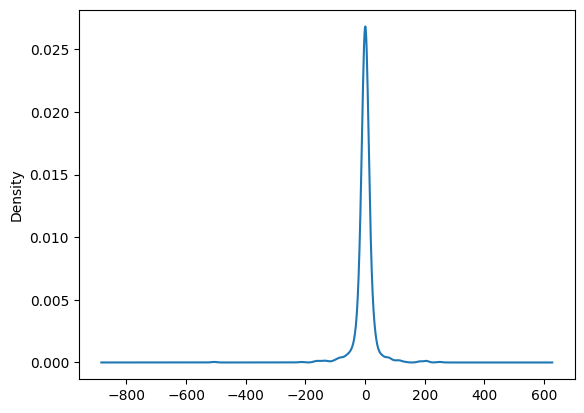

In [ ]:
model.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

<Axes: xlabel='date'>

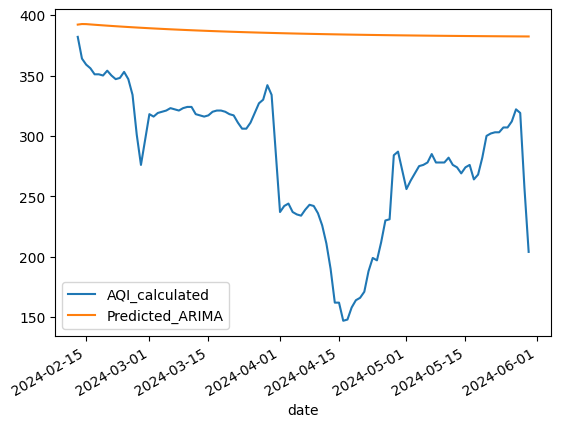

In [ ]:
test_data[['AQI_calculated','Predicted_ARIMA']].plot()

## Sarimax

In [ ]:
val = 'AQI_calculated'

In [ ]:
seasonal_data = df_delhi
seasonal_data = seasonal_data.resample(rule='W').mean()
seasonal_data

,AQI_calculated
date,
2021-01-03,462.000000
2021-01-10,475.714286
2021-01-17,496.000000
2021-01-24,447.714286
2021-01-31,405.833333
...,...
2024-05-05,271.000000
2024-05-12,279.285714
2024-05-19,272.428571


In [ ]:
delhi_aqi = seasonal_data[val]

In [ ]:
delhi_aqi.isna().sum()

0

In [ ]:
# seasonal_data[seasonal_data.isnull().all(axis=1)]

In [ ]:
# med = delhi_aqi.median()

In [ ]:
# delhi_aqi.fillna(med, inplace=True)

In [ ]:
# delhi_aqi.isna().sum()

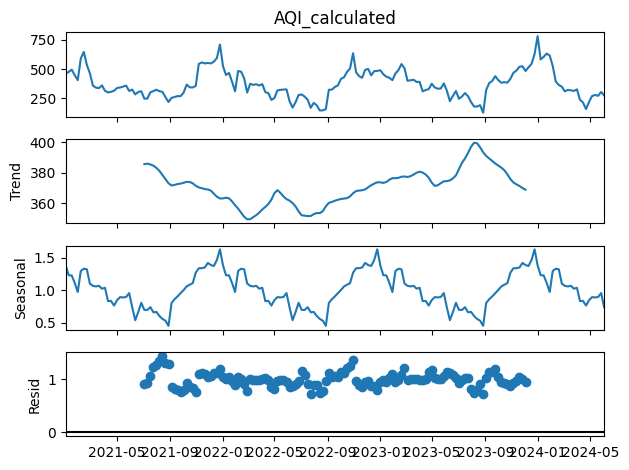

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(delhi_aqi, model='multiplicative', period=52)
result.plot();

In [ ]:
auto_arima(y=delhi_aqi,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=52)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 0, 52),
      suppress_warnings=True)

In [ ]:
delhi_aqi.shape

(179,)

In [ ]:
# df_delhi.head()

In [ ]:
# train = df_delhi.iloc[:1145]
# test = df_delhi.iloc[1145:]

In [ ]:
train = delhi_aqi[:100]
test = delhi_aqi[100:]

In [ ]:
print(train.shape)
print(test.shape)

(100,)
(79,)


In [ ]:
train.tail()

date
2022-10-30    635.142857
2022-11-06    472.666667
2022-11-13    439.857143
2022-11-20    426.142857
2022-11-27    493.571429
Freq: W-SUN, Name: AQI_calculated, dtype: float64

In [ ]:
test.head()

date
2022-12-04    501.166667
2022-12-11    446.857143
2022-12-18    483.000000
2022-12-25    484.428571
2023-01-01    490.500000
Freq: W-SUN, Name: AQI_calculated, dtype: float64

In [ ]:
# pred_start_date=test.index[0]
# pred_end_date=test.index[-1]
# print(pred_start_date)
# print(pred_end_date)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarimax=SARIMAX(train,order=(1,0,0),seasonal_order=(2,0,0,52))
results=model_sarimax.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     AQI_calculated   No. Observations:                  100
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 52)   Log Likelihood                -553.817
Date:                            Tue, 04 Jun 2024   AIC                           1115.634
Time:                                    17:35:47   BIC                           1126.055
Sample:                                01-03-2021   HQIC                          1119.852
                                     - 11-27-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9802      0.018     54.709      0.000       0.945       1.015
ar.S.L52       0.0032      0.053      0.061      0.952      -0.100       0.107
ar.S.L104      0.9822      0.298      3.290      0.001       0.397       1.567
sigma2       128.4348   2134.537      0.060      0.952   -4055.180    4312.050
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                17.91
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.27
Prob(H) (two-sided):                  0.28   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# predictions = results.predict(start=datetime(2024,2,12),end=datetime(2024,5,30))

In [ ]:
pred_start_date = pd.to_datetime(test.index[0])
pred_end_date = pd.to_datetime(test.index[-1])
print(pred_start_date)
print(pred_end_date)

2022-12-04 00:00:00
2024-06-02 00:00:00


In [ ]:
predictions = results.predict(start=pred_start_date, end=pred_end_date, typ='levels').rename('predictions')
# pred.index = pd.date_range(start=pred_start_date, end=pred_end_date, freq='D')

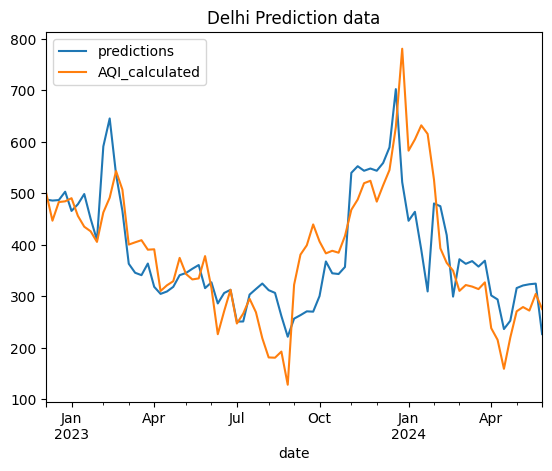

In [ ]:
predictions.plot(legend=True)
test.plot(legend=True,title="Delhi Prediction data");

### for predicting only 2024 data

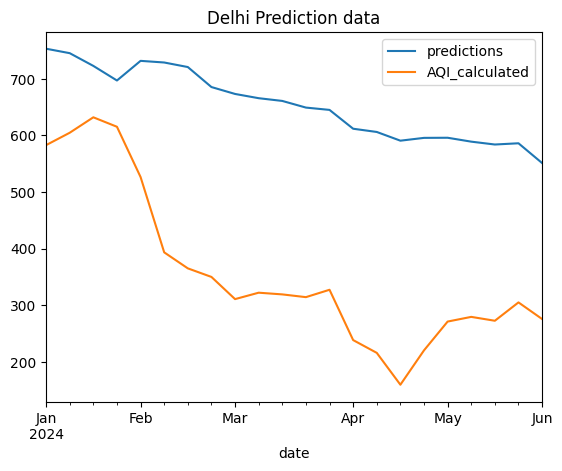

In [ ]:
predictions.plot(legend=True)
test.plot(legend=True,title="Delhi Prediction data");

In [ ]:
n_steps = (pred_end_date - pred_start_date).days + 1
pred = results.predict(start=len(train_data), end=len(train_data) + n_steps - 1)

pred.index = pd.date_range(start=pred_start_date, end=pred_end_date, freq='D')
residuals = test_data['AQI_calculated'] - pred

# Sarimax for monthly data

In [ ]:
val = 'AQI_calculated'

In [ ]:
seasonal_data = df_delhi
seasonal_data = seasonal_data.resample(rule='M').mean()
seasonal_data

,AQI_calculated
date,
2021-01-31,458.566667
2021-02-28,562.740741
2021-03-31,349.733333
2021-04-30,311.310345
2021-05-31,341.666667
2021-06-30,303.758621
2021-07-31,287.466667
2021-08-31,271.366667
2021-09-30,264.551724


In [ ]:
delhi_aqi = seasonal_data[val]

In [ ]:
#  seasonal_data[seasonal_data.isnull().all(axis=1)]

In [ ]:
delhi_aqi.isna().sum()

0

In [ ]:
med = delhi_aqi.median()
delhi_aqi.fillna(med, inplace=True)
delhi_aqi.isna().sum()

0

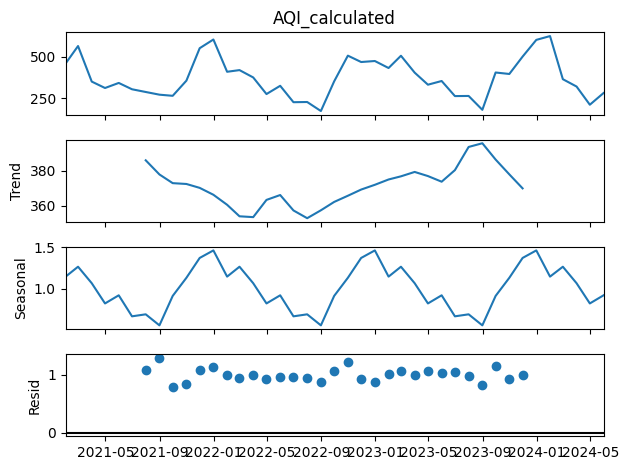

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(delhi_aqi, model='multiplicative', period=12)
result.plot();

In [ ]:
# !pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_arima(y=delhi_aqi,start_p=0,start_P=0,start_q=0,start_Q=0, seasonal=True, m=12, n_jobs=-1)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
delhi_aqi.shape

(41,)

In [ ]:
train = delhi_aqi[:30]
test = delhi_aqi[30:]

In [ ]:
print(train.shape)
print(test.shape)

(30,)
(11,)


In [ ]:
train.tail()

date
2023-02-28    504.518519
2023-03-31    403.433333
2023-04-30    331.137931
2023-05-31    353.266667
2023-06-30    262.896552
Freq: M, Name: AQI_calculated, dtype: float64

In [ ]:
test.tail()

date
2024-01-31    622.400000
2024-02-29    364.071429
2024-03-31    320.066667
2024-04-30    211.103448
2024-05-31    281.233333
Freq: M, Name: AQI_calculated, dtype: float64

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax=SARIMAX(train,order=(0,0,0),seasonal_order=(1,1,0,12))
results=model_sarimax.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:           AQI_calculated   No. Observations:                   30
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -100.615
Date:                  Tue, 04 Jun 2024   AIC                            205.230
Time:                          17:13:27   BIC                            207.010
Sample:                      01-31-2021   HQIC                           205.475
                           - 06-30-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8925      0.122     -7.319      0.000      -1.132      -0.653
sigma2      1486.9918   1527.217      0.974      0.330   -1506.298    4480.281
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.59   Prob(JB):                         0.47
Heteroskedasticity (H):               1.10   Skew:                             0.65
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date = datetime(2023,7,31)
pred_end_date = datetime(2024,5,31)

In [ ]:
predictions = results.predict(start=pred_start_date, end=pred_end_date)

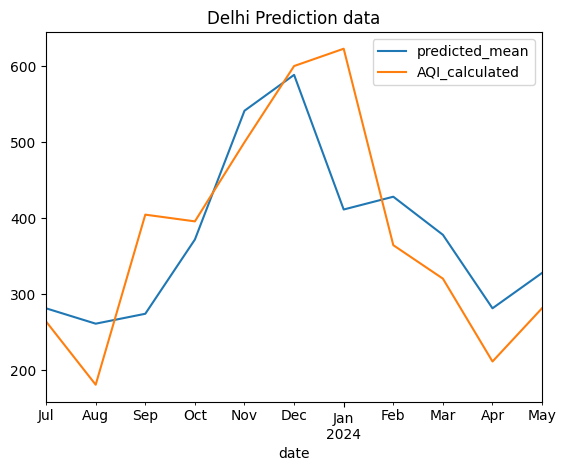

In [ ]:
predictions.plot(legend=True)
test.plot(legend=True,title="Delhi Prediction data");

# sarimax for daily data

In [ ]:
val = 'AQI_calculated'

In [ ]:
seasonal_data = df_delhi
# seasonal_data = seasonal_data.resample(rule='M').mean()
seasonal_data

,AQI_calculated
date,
2021-01-01,467.0
2021-01-02,459.0
2021-01-03,460.0
2021-01-04,465.0
2021-01-05,470.0
...,...
2024-05-26,312.0
2024-05-27,322.0
2024-05-28,319.0


In [ ]:
delhi_aqi = seasonal_data[val]

In [ ]:
delhi_aqi.isna().sum()

0

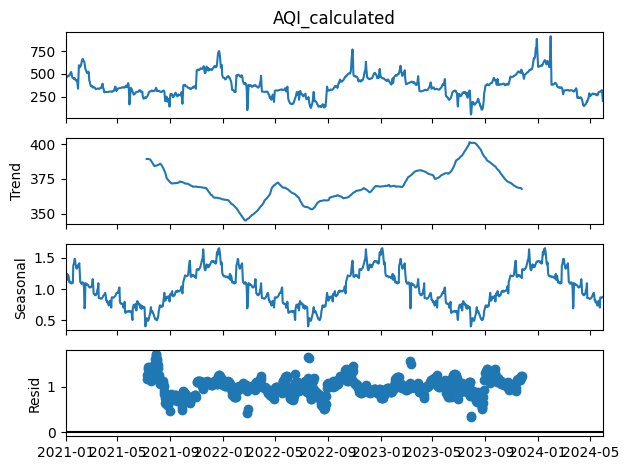

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(delhi_aqi, model='multiplicative', period=365)
result.plot();

In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_arima(y=delhi_aqi,start_p=0,start_P=0,start_q=0,start_Q=0, seasonal=True, m=365, n_jobs=-1)

In [ ]:
from darts.datasets import AirPassengersDataset
from darts.models import StatsForecastAutoARIMA
from darts.utils.timeseries_generation import datetime_attribute_timeseries
series = AirPassengersDataset().load()
series
# optionally, use some future covariates; e.g. the value of the month encoded as a sine and cosine series
# future_cov = datetime_attribute_timeseries(series, "month", cyclic=True, add_length=6)
# # define StatsForecastAutoARIMA parameters
# model = StatsForecastAutoARIMA(season_length=12)
# model.fit(series, future_covariates=future_cov)
# pred = model.predict(6, future_covariates=future_cov)
# pred.values()

# Final Run

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
model_order = {}

for city in copy_df['city'].value_counts().index:


  df_city = copy_df[copy_df['city']== city][['date', 'AQI_calculated']]
  df_city['date'] = pd.to_datetime(df_city['date'], yearfirst=True)
  df_city.sort_values('date', ascending=True, inplace=True)
  df_city.set_index('date', inplace=True)
  df_city = df_city.resample(rule='MS').mean()
  df_city.fillna(df_city['AQI_calculated'].median(), inplace=True)

  globals()[f'df_{city.lower()}'] = df_city

  print('\n\n',city,'\n\n')
  adf_test(df_city['AQI_calculated'])

In [ ]:
city_list = [f'df_{city.lower()}' for city in copy_df['city'].value_counts().index]
city_list

In [ ]:
chennai_series = df_chennai['AQI_calculated']
delhi_series = df_delhi['AQI_calculated']
mumbai_series = df_mumbai['AQI_calculated']
hyderabad_series = df_hyderabad['AQI_calculated']
bengaluru_series = df_bengaluru['AQI_calculated']
lucknow_series = df_lucknow['AQI_calculated']
patna_series = df_patna['AQI_calculated']
kolkata_series = df_kolkata['AQI_calculated']
jaipur_series = df_jaipur['AQI_calculated']
visakhapatnam_series = df_visakhapatnam['AQI_calculated']
thiruvananthapuram_series = df_thiruvananthapuram['AQI_calculated']
chandigarh_series = df_chandigarh['AQI_calculated']
nashik_series = df_nashik['AQI_calculated']
gadhinagar_series = df_gandhinagar['AQI_calculated']
bhopal_series = df_bhopal['AQI_calculated']
nagpur_series = df_nagpur['AQI_calculated']
ghaziabad_series = df_ghaziabad['AQI_calculated']
hapur_series = df_hapur['AQI_calculated']
muzaffarnagar_series = df_muzaffarnagar['AQI_calculated']
shillong_series = df_shillong['AQI_calculated']
thrissur_series = df_thrissur['AQI_calculated']
mysore_series = df_mysore['AQI_calculated']

In [ ]:
city_series = [f'{city.lower()}_series' for city in copy_df['city'].value_counts().index]

# for df in city_list:
#   final = df.AQI_calculated

In [ ]:
for df in city_list:
  print(df)
  final_series = df['AQI_calculated']

In [ ]:
model_order = {}
val = 'AQI_calculated'
for df in city_list:


  model = auto_arima(y=final_series,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)

  print('\n\n',df,'\n\n')
  print(model)

  model_order[city] = model

In [ ]:
df_chennai['AQI_calculated']

In [ ]:
model_arima = auto_arima(df_delhi['AQI_calculated'], suppress_warnings=True)


In [ ]:
model_arima

In [ ]:
for df_city, city in zip(copy_df['city'].value_counts().index, city_list):
  print(df_city, ' : ', city)

In [ ]:
for city, df_city in zip(copy_df['city'].value_counts().index, city_list):
  df_city = city

In [ ]:
df

In [ ]:
# Dictionary to hold DataFrames
city_dfs = {}

# Loop through each city and create a DataFrame for each
for city in copy_df['city'].value_counts().index:
    df_city = copy_df[copy_df['city'] == city][['date', 'AQI_calculated']]
    df_city['date'] = pd.to_datetime(df_city['date'], yearfirst=True)
    df_city.sort_values('date', ascending=True, inplace=True)
    df_city.set_index('date', inplace=True)
    df_city = df_city.resample(rule='M').max()  # Reassign the resampled DataFrame

    # Store the DataFrame in the dictionary
    city_dfs[city] = df_city

    # Create a global variable for each DataFrame
    globals()[f'df_{city.lower()}'] = df_city

    print('\n\n', city, '\n\n')

    # Perform ADF test on the AQI_calculated series
    adf_test(df_city['AQI_calculated'])


